# Project: The Movie Database (TMDb) Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I did my investigation around The Movie Database (TMDb) originally provided by Kaggle. This data set contains data about movies released from the early 1960's to the mid 2010's. I mainly focused on the data provided regarding genre, revenue, and release year. I was interested to see what genres we're most popular from year to year and what some of the highest revenue earning movies are.

In [1]:
#Importing the packages that I will need for my analysis

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling



### General Properties
>
>When loading the data we can see that this data set contains information about individual movies' revenue, budgjet, cast, director, genres, a popularity scale, and release date.
>
>The variables that interest me are revenue, budget, popularity, release year, and genres. For my entire analysis I will mainly use the adjusted budget and asjusted revenue columns so that any dollar comparisions will be accurate.

In [2]:
#Loading data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a></a>
> Below I will use .info() to see the different columns, datatypes, and and any columns that may contain missing values.
>
>The columns that I will be most interested in for my analyis are popularity, revenue, original_title, genres, vote_count, vote_average, release_year, budget_adj, and revenue_adj. Additionally I'd like to keep one of the id columns intact so I can use it on join operations in the future, since imdb_id has some missing values I will use the indexed id column instead.


In [3]:
#looking for appropriate datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning: dropping missing values and un-needed data
>
>There are a few columns with missing values, but some of them won't be relevant to my analysis so I will drop those columns first before dropping rows with missing values so that I don't lose any valuable data.

In [4]:
#dropping unneeded columns
df.drop(['imdb_id', 'cast', 'production_companies', 'budget', 'revenue', 'homepage', 'director', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)
#dropping rows with missing data so they do not interefer with the acuracy of my analysis
df = df.dropna(axis=0, how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 11 columns):
id                10843 non-null int64
popularity        10843 non-null float64
original_title    10843 non-null object
runtime           10843 non-null int64
genres            10843 non-null object
release_date      10843 non-null object
vote_count        10843 non-null int64
vote_average      10843 non-null float64
release_year      10843 non-null int64
budget_adj        10843 non-null float64
revenue_adj       10843 non-null float64
dtypes: float64(4), int64(4), object(3)
memory usage: 1016.5+ KB


>I'm happy with the data types since most of the numerical values are int types, except for the budget and revenue which need to be floats since they are large numbers and need to be expressed in scientific format. I will not change any datatypes right now, although I might try to change genres into multiple rows in order to get any genre specific analysis.
>
>Next I will drop any duplicated rows, I believe there was only one but it's better to be sure that there aren't any.

In [5]:
#dropping duplicates
df = df.drop_duplicates()
#checking for duplicates
sum(df.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis

### Which Genre had the most releases year-to-year?
>This was my first attempt to see which genre was most popular year-to-year. But then I realized that the number of releases isn't the equivelence of popularity and that the popularity, vote, or revenue columns might be better to explore to answer this question. I will look at those columns later on.
>
>In order to see which genres were most popular for any year I will need to seperate the genres into seperate values from their current format. To do this I split the 'genres' columns by the seperating character '|' and passed those values as a list into a new dataframe that was indexed by release year.
>This gave me a table of genres per movie and year.

In [6]:
#Creating a dataframe with only genre and release year information.
df_genres = pd.DataFrame(df['genres'].str.split(pat='|').values.tolist(), df['release_year'])
df_genres.head()

,0,1,2,3,4
release_year,,,,,
2015,Action,Adventure,Science Fiction,Thriller,None
2015,Action,Adventure,Science Fiction,Thriller,None
2015,Adventure,Science Fiction,Thriller,None,None
2015,Action,Adventure,Science Fiction,Fantasy,None
2015,Action,Crime,Thriller,None,None


>I had a hard time trying to figure out how to collapse the multiple rows or genres into one row while keeping the release year in-tact. 
>
>I used the .stack() function to stack the genre value rows, then I reset the index so that the release_year column would be a value column.
>
>Lastly I dropped the resulting 'level' column from using the .stack() function which specified which column the row originally came from. I didn't see this information as useful at the time. 
>
>The resulting was a 2 column dataframe with only the release_year and the genres of the movies.

In [7]:
#Stacking the genre rows
df_genres_stacked = pd.DataFrame(data=df_genres.stack(level=-1, dropna=False))
#Reseting the index to an incremental number and using the year as a value column
df_genres_stacked = df_genres_stacked.reset_index()
#Dropping resulting level column
df_genres_stacked = df_genres_stacked.drop(columns='level_1')
df_genres_stacked.head()

,release_year,0
0,2015,Action
1,2015,Adventure
2,2015,Science Fiction
3,2015,Thriller
4,2015,None


>Next I wanted to go year by year and genre by genre and see what the number of releases of that genre were for that year.
>
>This required a double for loop, one for the year and one for the genre so it might take a while to process.

In [26]:
#Dropping 'None' values that resulted from seperating and stacking the genres.
df_genres_stacked = df_genres_stacked.dropna()
#Renaming the columns for easier processing and clarity
df_genres_stacked.columns = ['Year', 'Genre']
#declaring the empty list to append the value groups to
year_genre_count = []
#getting a list of all the years to loop through
years = df_genres_stacked['Year'].unique()
#getting a list of all the genres to loop through
genres = df_genres_stacked['Genre'].unique()
#this takes awhile
for y in years:
    for g in genres:
            #appending a list containing year, genre, and number of releases onto the list
            year_genre_count.append([y, g, df_genres_stacked.query('Genre == "{0}" and Year == {1}'.format(g, y)).shape[0]])

>This resulted in a list of lists that contained the year, genre, and number of releases within that year of that genre.

In [27]:
#taking a peek at the list
year_genre_count[:5]

[[2015, 'Action', 107],
 [2015, 'Adventure', 69],
 [2015, 'Science Fiction', 86],
 [2015, 'Thriller', 171],
 [2015, 'Fantasy', 33]]

> Next I put this data into a dataframe for easier reading and access

In [28]:
df_genre_by_count = pd.DataFrame(year_genre_count, columns=['year', 'genre', 'count'])
df_genre_by_count.head()

,year,genre,count
0,2015,Action,107
1,2015,Adventure,69
2,2015,Science Fiction,86
3,2015,Thriller,171
4,2015,Fantasy,33


>So to see what the most popular genre was for each year I would need the genre which had the max amount of releases for each year. To do this I also used another for loop to loop through the years and get the max number of releases per year using .idxmax()

In [29]:
#this will be the new dataframe I append onto
most_popular = pd.DataFrame(columns=['year', 'genre'])
#loop through each year
for y in years:
    #get the index of the highest release count for that year
    i = (df_genre_by_count.query('year == {0}'.format(y))['count']).idxmax()
    #use that index to append onto the new dataframe
    most_popular = most_popular.append(df_genre_by_count.loc[i, ['year','genre']])
#sort by year
most_popular.sort_values('year')


,year,genre
887,1960,Drama
867,1961,Drama
787,1962,Drama
967,1963,Drama
807,1964,Drama
1047,1965,Drama
1107,1966,Drama
950,1967,Comedy
727,1968,Drama
1067,1969,Drama


>I thought this turned out to be kind of boring since 'Drama' ended up being most of the outcomes. I decided to do this process again but this time ignore the genre 'Drama' to see if the outcome would be more interesting.

In [30]:
#this takes awhile
year_genre_count_2 = []
for y in years:
    for g in genres:
        #ignore 'Drama' this time
        if g != 'Drama':
            year_genre_count_2.append([y, g, df_genres_stacked.query('Genre == "{0}" and Year == {1}'.format(g, y)).shape[0]])

In [31]:
#putting the list from the last cell into a dataframe
df_genre_by_count_2 = pd.DataFrame(year_genre_count_2, columns=['year', 'genre', 'count'])
#New dataframe for the genre with the most releases for each year but this time without 'Drama'
most_popular_2 = pd.DataFrame(columns=['year', 'genre'])
for y in years:
    i = (df_genre_by_count_2.query('year == {0}'.format(y))['count']).idxmax()
    most_popular_2 = most_popular_2.append(df_genre_by_count_2.loc[i, ['year','genre']])
#sort by year
most_popular_2.sort_values('year')


,year,genre
836,1960,Action
826,1961,Comedy
741,1962,Action
921,1963,Comedy
769,1964,Comedy
991,1965,Thriller
1054,1966,Comedy
902,1967,Comedy
693,1968,Comedy
1016,1969,Comedy


>After ignoring Genre the results seemed a little more interesting. In both of these tables I was most interested by "Adventure" being the most released genre in 1977 since it was the most unique value in both tables. 
>
>This made me interested about the year 1977.

### What movie had the highest revenue year-to-year?

>After my last question I realized that revenue might be a better indicator of popularity or success. So I then tried to find out which movies had the highest revenue year-to-year.
>
>I did a similiar process as the last question and looped through the years and filtered the results by using a query on the 'release_year'. Except this time I did the .idxmax() on the revenue_adj column instead to get the max revenue for each year.
>
>This time I was interested in what individual movies had high revenue so I also used the 'original_title' column in this question.

In [32]:
#new dataframe for highest revenue for each year
most_revenue = pd.DataFrame()
#loop through the unique years
for y in years:
    #query on the year and get the id of the max revenue
    i = df.query('release_year == {0}'.format(y))['revenue_adj'].idxmax()
    #using that id to append that row onto the new dataframe
    most_revenue = most_revenue.append(df.loc[i, ['release_year','original_title', 'revenue_adj']])

#changing the release year to int
most_revenue['release_year'] = most_revenue['release_year'].astype(int)
#sorting by year
most_revenue.sort_values('release_year')


,original_title,release_year,revenue_adj
10143,Spartacus,1960,4.423780e+08
10110,One Hundred and One Dalmatians,1961,1.574815e+09
9850,Lawrence of Arabia,1962,5.045914e+08
10438,From Russia With Love,1963,5.617734e+08
9881,Goldfinger,1964,8.780804e+08
10690,The Sound of Music,1965,1.129535e+09
10822,Who's Afraid of Virginia Woolf?,1966,2.266436e+08
10398,The Jungle Book,1967,1.345551e+09
9719,2001: A Space Odyssey,1968,3.555466e+08
10725,Butch Cassidy and the Sundance Kid,1969,6.081511e+08


>This was a fun table to look through. It almost felt like a piece of history to see which movies made the most money each year. Since I was still curious about 1977 from the last question the result of "Star Wars" being the most revenue making movie in 1977 stood out to me.

### How did revenue differ year-to-year for Action, Drama, and Comedy?
>
>For this next question I just wanted to see a variance in revenue over time. Action, Drama, and Comedy all seemed to be pretty common genres and I was curious if their revenue would fluctuate drastically over time or if it would remain constant given the genres' commonality.
>
>So I made a bar chart of the mean adjusted revenue for each year for each of the three genres.

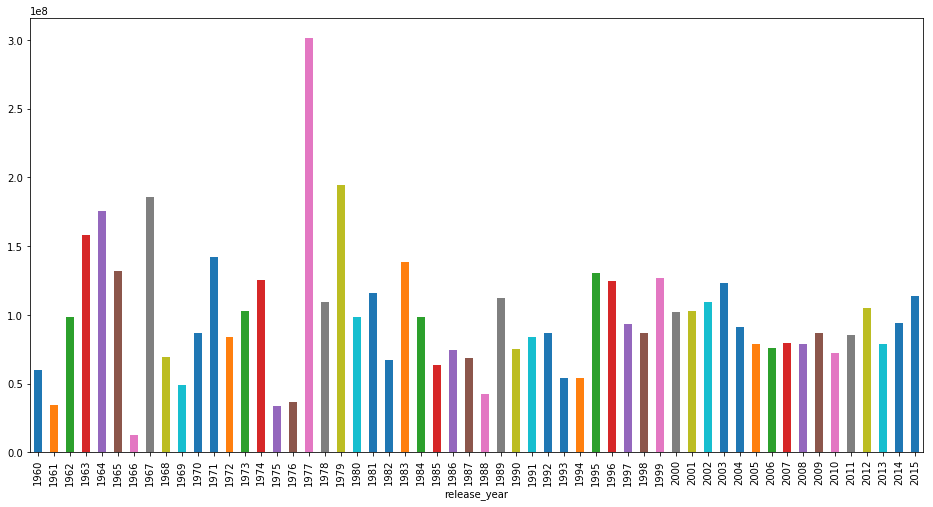

In [45]:
#Finding the rows that contain "Action" as a genre
action = df.loc[df.genres.str.contains("Action")]
#grouping the action rows by year
action_by_year = pd.DataFrame(action.groupby('release_year').mean()['revenue_adj'], columns=['revenue_adj'])
#grouping by 'release_year' and then getting the mean of 'revenue_adj'
action_mean_revenue_by_year = action_by_year.groupby('release_year').mean()['revenue_adj']
#platting the bar chart
action_mean_revenue_by_year.plot(x='release_year', y='revenue_adj', kind='bar', figsize=(16, 8))

>
>1977 Stands out again in this bar chart.
>
>Next I do the same for 'Drama' and 'Comedy' genres.

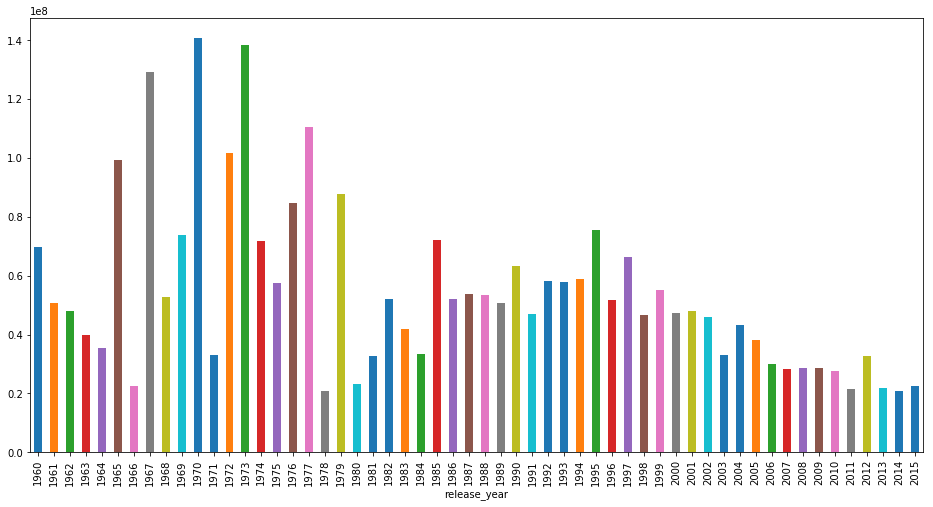

In [46]:
df.loc[df.genres.str.contains("Drama")].groupby('release_year').mean()['revenue_adj'].plot(x='release_year', y='revenue_adj', kind='bar', figsize=(16, 8))

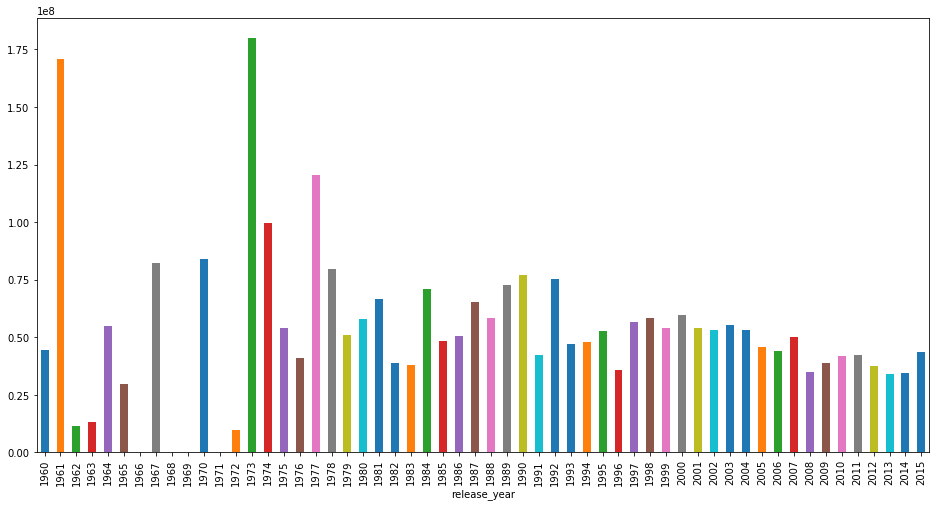

In [17]:
df.loc[df.genres.str.contains("Comedy")].groupby('release_year').mean()['revenue_adj'].plot(x='release_year', y='revenue_adj', kind='bar', figsize=(16, 8))

>As it turns out there seems to be a lot of variance in revenue from year-to-year given some of the most common genres. The year 1977 had a higher bar than most of the others in all three genres. 
>
>This makes me curious about 'Star Wars' and if it's revenue could be so large that it is causing these spikes across all three bar graphs.

### How did Star Wars' revenue compare to other high grossing films released that year? overall?
>
>I would like to get a visual of how 'Star Wars' revenue compared to other high revenue movies from that year, as well as compared to the other highest revenue earning movies from other years.
>
>First I will take a look at the cut-off for the top 75% of revenue from movies from 1977.

In [18]:
#Query all the movies released in 1977 and use describe to get the top 75%
df.query('release_year == 1977')['revenue_adj'].describe()

count    5.700000e+01
mean     1.376362e+08
std      4.146903e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      9.503416e+07
max      2.789712e+09
Name: revenue_adj, dtype: float64

> I used this number to query all the movies from 1977 with a higher revenue than this in order to get the highest revenue earning movies from that year.
>
>Then I ploted that information into a pie chart using labels with the movies' original titles for visual clarity and readability.

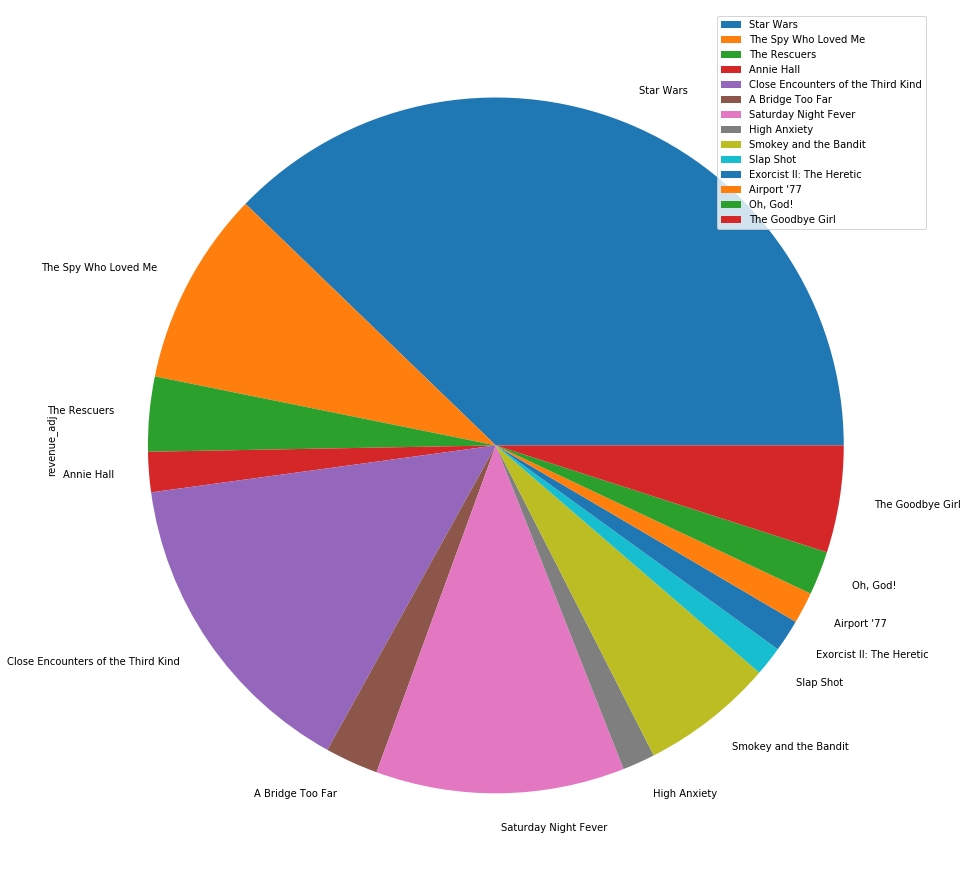

In [19]:
#creating labels for pie chart with movie titles
movie_labels = df.query('release_year == 1977 and revenue_adj > 9.503416e+07').original_title.tolist()
#creating pie chart
pd.DataFrame(df.query('release_year == 1977 and revenue_adj > 9.503416e+07')).plot(y='revenue_adj', labels=movie_labels, kind='pie', figsize=(16, 16))

>It is appearent that 'Star Wars' outperformed it's compitition that year.
>
>Next I will use my most_revenue frame from earlier to create a similiar pie chart of the highest revenue movies for each year.
>I would like to see if 'Star Wars' will make the cut-off of being in the top 75% overall, as well as how it compares to other movies from other years.

In [20]:
#using describe to get the top 75%
most_revenue.describe()

,release_year,revenue_adj
count,56.000000,5.600000e+01
mean,1987.500000,1.107015e+09
std,16.309506,5.577127e+08
min,1960.000000,2.266436e+08
25%,1973.750000,7.071561e+08
50%,1987.500000,1.012693e+09
75%,2001.250000,1.296958e+09
max,2015.000000,2.827124e+09


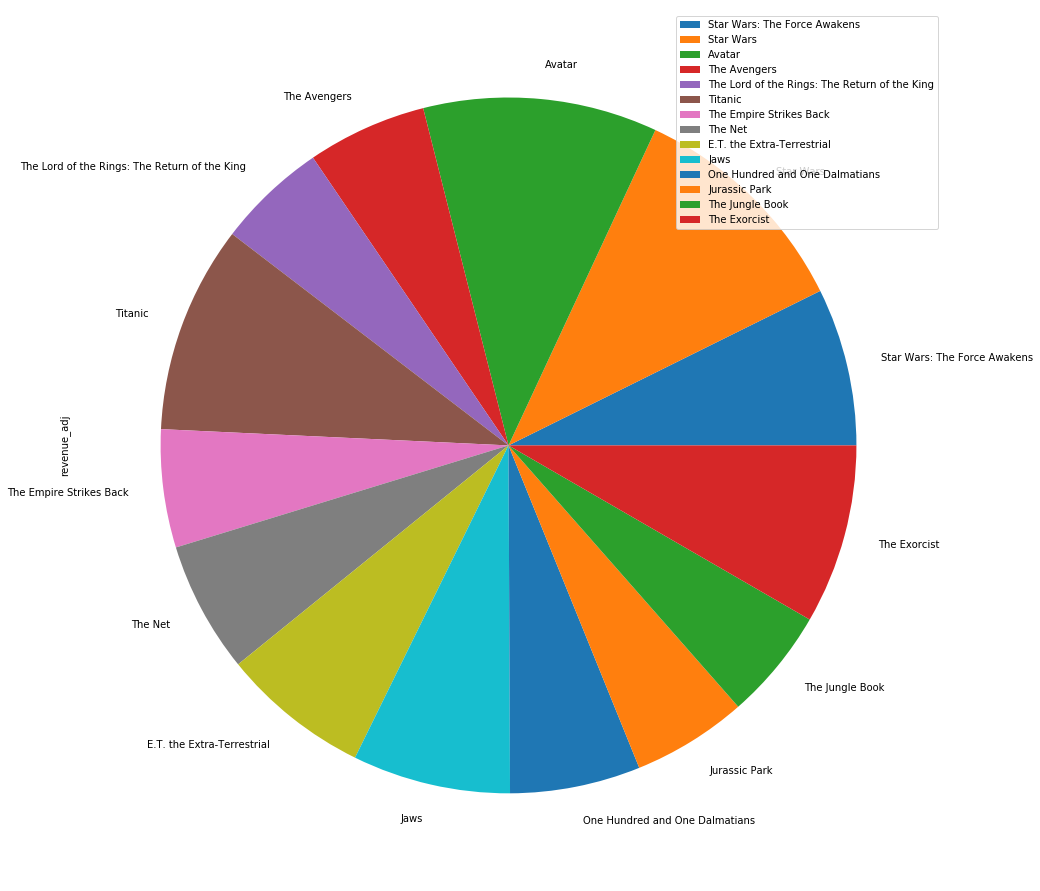

In [21]:
#creating the labels using titles
movie_labels = most_revenue.query('revenue_adj > 1.296958e+09').original_title.tolist()
#creaating the pie chart, not specifying year this time
pd.DataFrame(most_revenue.query('revenue_adj > 1.296958e+09')).plot(y='revenue_adj', labels=movie_labels, kind='pie', figsize=(16, 16))

>From the pie chart we can see that 'Star Wars' made it into the highest revenue movies overall as well as looking like it might be tied for the most revenue earned along with Titantic, and Avatar.

### Do any properties correlate with a high popularity score?

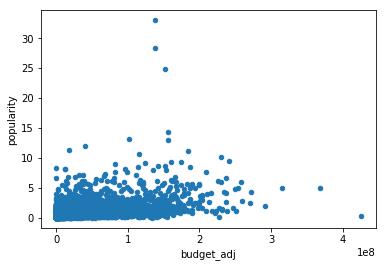

In [22]:
df.plot(x='budget_adj', y='popularity', kind='scatter')

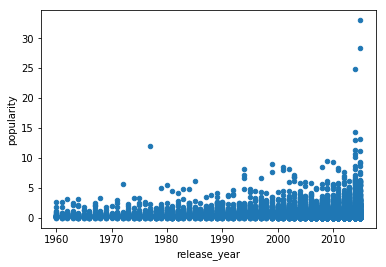

In [23]:
df.plot(x='release_year', y='popularity', kind='scatter')

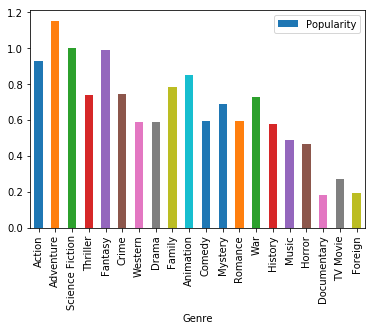

In [24]:
df['genres'] = df['genres'].astype(str)
df_genre_pop = []
for g in df_genres_stacked['Genre'].unique():
    df_genre_pop.append([g, df[df.genres.str.contains("{0}".format(g))].popularity.mean()])
df_genre_pop = pd.DataFrame(data=df_genre_pop, columns=['Genre', 'Popularity'])
df_genre_pop.plot(x='Genre', y='Popularity', kind='bar')
    

>The scatter plot comparing popularity and year has a strong positive correlation, which makes me think that this popularity score was implimented in a modern time when people are more likely to know more modern movies than older movies.
>
>I also wanted to see if this bar chart would look similiar if we measured revenue instead of popularity. I assumed it would since I imagine more popular movies have higher revenues.

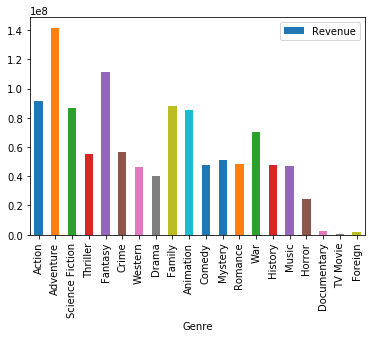

In [39]:
df_genre_revenue = []
for g in df_genres_stacked['Genre'].unique():
    df_genre_revenue.append([g, df[df.genres.str.contains("{0}".format(g))].revenue_adj.mean()])
df_genre_revenue = pd.DataFrame(data=df_genre_revenue, columns=['Genre', 'Revenue'])
df_genre_revenue.plot(x='Genre', y='Revenue', kind='bar')

>There seem to be some similiarities between the two bar graphs with the exception of 'Documentary', 'TV Movie', and 'Foreign' genres. These genres must be slightly cheaper to make but still hold popularity comparitively.


<a id='conclusions'></a>
## Conclusions

>In conclusion, I have discovered that 'Drama' and 'Comedy' are very common genre types. They may be so common that their labels do not hold much significance and more specific genre types might be more useful.
>
>I was also surpirsed that I wasn't familiar with all of the best selling movies for each year.
>
>I discovered that the first premier of 'Star Wars' had a huge impact on the movie market in 1977 as well as overall. I was surprised that it held up against some more modern, high earning movies like Avatar. I don't know much about 'Star Wars' and I'm curious as to why it's debut screening did so well. My only thought is that the recent advancements in technology like personal computers and recent satelite launches from NASA might have made the population exctied about a new space movie.